In [9]:
import os 
import sys
import platform
from os.path import join as pjoin
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
# Pynwb imports
from hdmf_zarr import NWBZarrIO

In [2]:
sys.path.insert(0,'/code/src')
from bci.loaders import load 

In [3]:
# set data path
platstring = platform.platform()
system = platform.system()
if system == "Darwin":
    # macOS
    data_dir = "/Volumes/Brain2025/"
elif system == "Windows":
    # Windows (replace with the drive letter of USB drive)
    data_dir = "E:/"
elif "amzn" in platstring:
    # then on CodeOcean
    data_dir = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_dir = "/media/$USERNAME/Brain2025/"
    
print('data directory set to', data_dir)

data directory set to /data/


In [4]:
# Load metadata csv file
metadata = pd.read_csv(os.path.join(data_dir, 'bci_task_metadata', 'bci_metadata.csv'))
# Get all mice available
subject_ids = np.sort(metadata['subject_id'].unique())
# Select one mice
n_subjects = len(subject_ids)
subject_id = subject_ids[1]#754303
# Select one subject metadata, sorted by 'session_number'
this_mouse_metadata = metadata[metadata['subject_id']==subject_id].sort_values(by='session_number')
# Pick one session for this mouse
session_name = this_mouse_metadata.name.values[-1]
print('Selected subject is', subject_id)
print('Selected session is', session_name)

Selected subject is 740369
Selected session is single-plane-ophys_740369_2025-01-30_18-44-54_processed_2025-08-04_13-31-14


In [11]:
save= True
savepath='/scratch'
save_format='jpg'

BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-10_18-06-31_processed_2025-08-03_20-39-09

NWB file: single-plane-ophys_731015_2025-01-10_18-06-31_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-10_18-06-31_processed_2025-08-03_20-39-09/single-plane-ophys_731015_2025-01-10_18-06-31_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-13_20-09-20_processed_2025-08-05_03-03-16

NWB file: single-plane-ophys_731015_2025-01-13_20-09-20_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-13_20-09-20_processed_2025-08-05_03-03-16/single-plane-ophys_731015_2025-01-13_20-09-20_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-24_20-00-44_processed_2025-08-04_06-27-07

NWB file: single-plane-ophys_731015_2025-01-24_20-00-44_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-24_20-00-44_processed_2025-08-04_06-27-07/single-plane-ophys_731015_2025-01-24_20-00-44_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-28_17-40-57_processed_2025-08-04_04-38-08

BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-28_17-40-57_processed_2025-08-08_15-30-22

NWB file: single-plane-ophys_731015_2025-01-28_17-40-57_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-28_17-40-57_processed_2025-08-08_15-30-22/single-plane-ophys_731015_2025-01-28_17-40-57_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-28_18-56-35_processed_2025-08-03_21-58-28

NWB file: single-plane-ophys_731015_2025-01-28_18-56-35_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-28_18-56-35_processed_2025-08-03_21-58-28/single-plane-ophys_731015_2025-01-28_18-56-35_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-31_20-37-19_processed_2025-08-06_05-37-58

NWB file: single-plane-ophys_731015_2025-01-31_20-37-19_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_731015_2025-01-31_20-37-19_processed_2025-08-06_05-37-58/single-plane-ophys_731015_2025-01-31_20-37-19_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_740369_2025-01-09_17-18-37_processed_2025-08-06_03-49-53

NWB file: single-plane-ophys_740369_2025-01-09_17-18-37_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_740369_2025-01-09_17-18-37_processed_2025-08-06_03-49-53/single-plane-ophys_740369_2025-01-09_17-18-37_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_740369_2025-01-13_17-31-04_processed_2025-08-04_17-59-13

NWB file: single-plane-ophys_740369_2025-01-13_17-31-04_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_740369_2025-01-13_17-31-04_processed_2025-08-04_17-59-13/single-plane-ophys_740369_2025-01-13_17-31-04_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_740369_2025-01-24_21-18-11_processed_2025-08-04_06-39-23

NWB file: single-plane-ophys_740369_2025-01-24_21-18-11_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_740369_2025-01-24_21-18-11_processed_2025-08-04_06-39-23/single-plane-ophys_740369_2025-01-24_21-18-11_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_740369_2025-02-03_19-18-31_processed_2025-08-03_23-27-56

NWB file: single-plane-ophys_740369_2025-02-03_19-18-31_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_740369_2025-02-03_19-18-31_processed_2025-08-03_23-27-56/single-plane-ophys_740369_2025-02-03_19-18-31_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_740369_2025-02-04_17-33-11_processed_2025-08-04_15-49-43

NWB file: single-plane-ophys_740369_2025-02-04_17-33-11_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_740369_2025-02-04_17-33-11_processed_2025-08-04_15-49-43/single-plane-ophys_740369_2025-02-04_17-33-11_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_740369_2025-02-17_19-26-59_processed_2025-08-05_14-38-08

NWB file: single-plane-ophys_740369_2025-02-17_19-26-59_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_740369_2025-02-17_19-26-59_processed_2025-08-05_14-38-08/single-plane-ophys_740369_2025-02-17_19-26-59_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_740369_2025-01-30_18-44-54_processed_2025-08-04_13-31-14

NWB file: single-plane-ophys_740369_2025-01-30_18-44-54_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_740369_2025-01-30_18-44-54_processed_2025-08-04_13-31-14/single-plane-ophys_740369_2025-01-30_18-44-54_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-22_18-22-38_processed_2025-08-06_18-52-36

NWB file: single-plane-ophys_754303_2025-01-22_18-22-38_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-22_18-22-38_processed_2025-08-06_18-52-36/single-plane-ophys_754303_2025-01-22_18-22-38_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-23_19-48-32_processed_2025-08-08_15-29-29

NWB file: single-plane-ophys_754303_2025-01-23_19-48-32_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-23_19-48-32_processed_2025-08-08_15-29-29/single-plane-ophys_754303_2025-01-23_19-48-32_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-27_20-01-31_processed_2025-08-07_06-00-10

NWB file: single-plane-ophys_754303_2025-01-27_20-01-31_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-27_20-01-31_processed_2025-08-07_06-00-10/single-plane-ophys_754303_2025-01-27_20-01-31_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-29_16-07-41_processed_2025-08-04_04-39-41

NWB file: single-plane-ophys_754303_2025-01-29_16-07-41_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-29_16-07-41_processed_2025-08-04_04-39-41/single-plane-ophys_754303_2025-01-29_16-07-41_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-31_15-13-50_processed_2025-08-05_20-00-52

NWB file: single-plane-ophys_754303_2025-01-31_15-13-50_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-31_15-13-50_processed_2025-08-05_20-00-52/single-plane-ophys_754303_2025-01-31_15-13-50_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-02-03_15-24-22_processed_2025-08-04_04-23-48

NWB file: single-plane-ophys_754303_2025-02-03_15-24-22_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-02-03_15-24-22_processed_2025-08-04_04-23-48/single-plane-ophys_754303_2025-02-03_15-24-22_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-22_16-45-18_processed_2025-08-06_17-55-43

NWB file: single-plane-ophys_766719_2025-01-22_16-45-18_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-22_16-45-18_processed_2025-08-06_17-55-43/single-plane-ophys_766719_2025-01-22_16-45-18_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-23_18-24-57_processed_2025-08-04_05-56-15

NWB file: single-plane-ophys_766719_2025-01-23_18-24-57_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-23_18-24-57_processed_2025-08-04_05-56-15/single-plane-ophys_766719_2025-01-23_18-24-57_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-27_18-25-39_processed_2025-08-07_04-04-45

NWB file: single-plane-ophys_766719_2025-01-27_18-25-39_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-27_18-25-39_processed_2025-08-07_04-04-45/single-plane-ophys_766719_2025-01-27_18-25-39_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-01-31_18-15-21_processed_2025-08-06_07-02-58

NWB file: single-plane-ophys_767715_2025-01-31_18-15-21_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-01-31_18-15-21_processed_2025-08-06_07-02-58/single-plane-ophys_767715_2025-01-31_18-15-21_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-03_17-30-05_processed_2025-08-03_23-22-19

NWB file: single-plane-ophys_767715_2025-02-03_17-30-05_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-03_17-30-05_processed_2025-08-03_23-22-19/single-plane-ophys_767715_2025-02-03_17-30-05_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-06_18-59-24_processed_2025-08-06_19-25-46

NWB file: single-plane-ophys_767715_2025-02-06_18-59-24_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-06_18-59-24_processed_2025-08-06_19-25-46/single-plane-ophys_767715_2025-02-06_18-59-24_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-10_16-04-20_processed_2025-08-05_12-52-18

NWB file: single-plane-ophys_767715_2025-02-10_16-04-20_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-10_16-04-20_processed_2025-08-05_12-52-18/single-plane-ophys_767715_2025-02-10_16-04-20_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-13_16-44-36_processed_2025-08-06_06-02-13

NWB file: single-plane-ophys_767715_2025-02-13_16-44-36_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-13_16-44-36_processed_2025-08-06_06-02-13/single-plane-ophys_767715_2025-02-13_16-44-36_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-17_17-41-50_processed_2025-08-05_01-05-20

NWB file: single-plane-ophys_767715_2025-02-17_17-41-50_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-17_17-41-50_processed_2025-08-05_01-05-20/single-plane-ophys_767715_2025-02-17_17-41-50_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_772414_2025-01-27_15-57-05_processed_2025-08-12_02-31-55

NWB file: single-plane-ophys_772414_2025-01-27_15-57-05_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_772414_2025-01-27_15-57-05_processed_2025-08-12_02-31-55/single-plane-ophys_772414_2025-01-27_15-57-05_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-04_13-21-29_processed_2025-08-12_06-14-42

BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-06_16-47-44_processed_2025-08-06_18-52-14

NWB file: single-plane-ophys_772414_2025-02-06_16-47-44_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-06_16-47-44_processed_2025-08-06_18-52-14/single-plane-ophys_772414_2025-02-06_16-47-44_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-10_11-15-26_processed_2025-08-04_23-06-21

NWB file: single-plane-ophys_772414_2025-02-10_11-15-26_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-10_11-15-26_processed_2025-08-04_23-06-21/single-plane-ophys_772414_2025-02-10_11-15-26_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


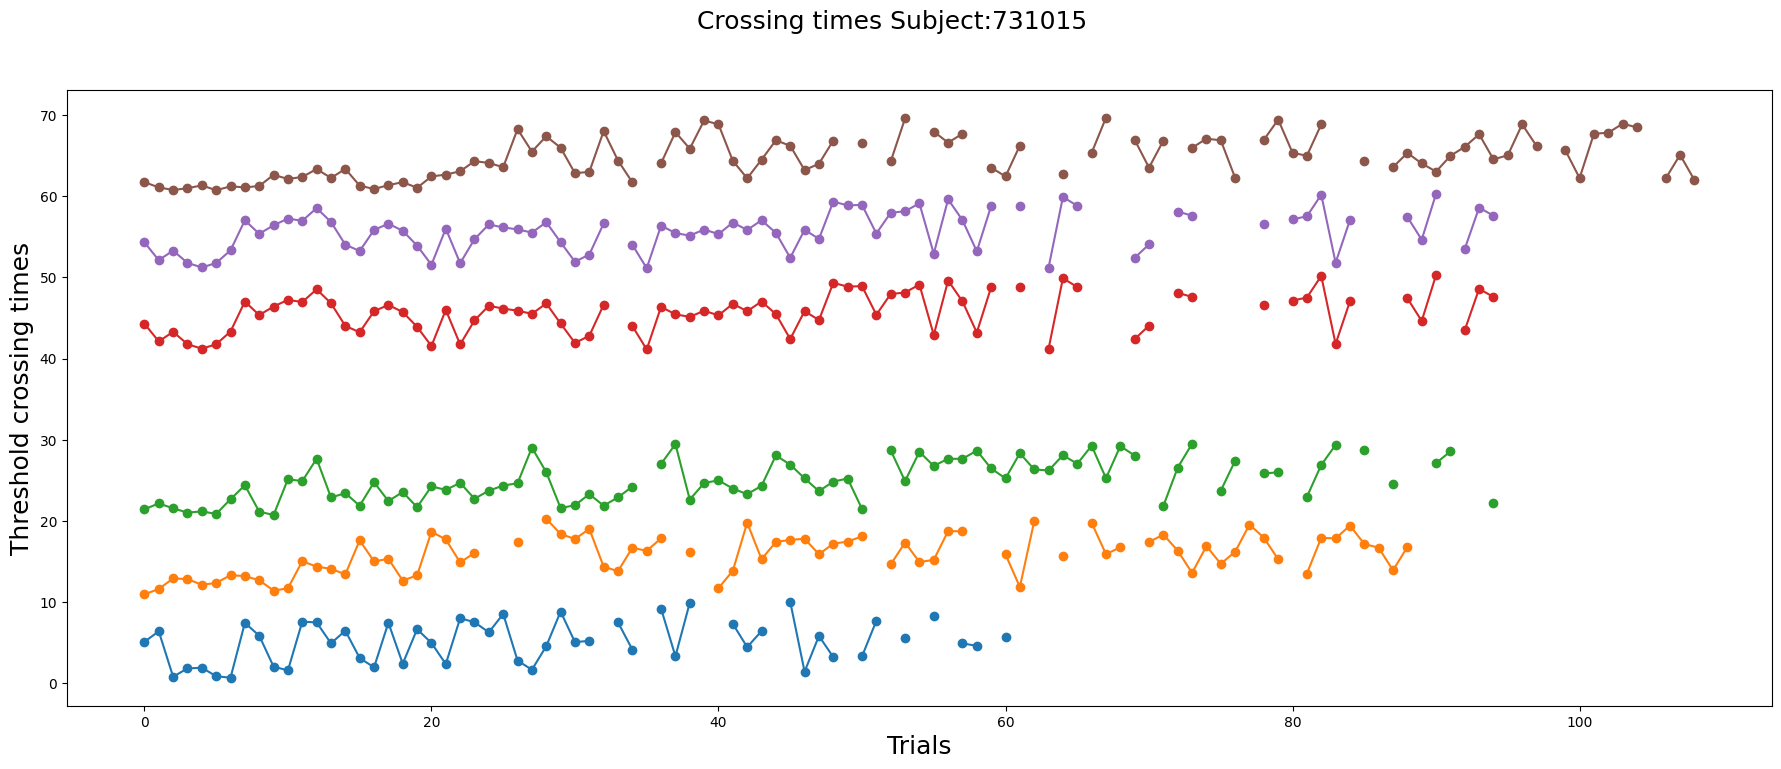

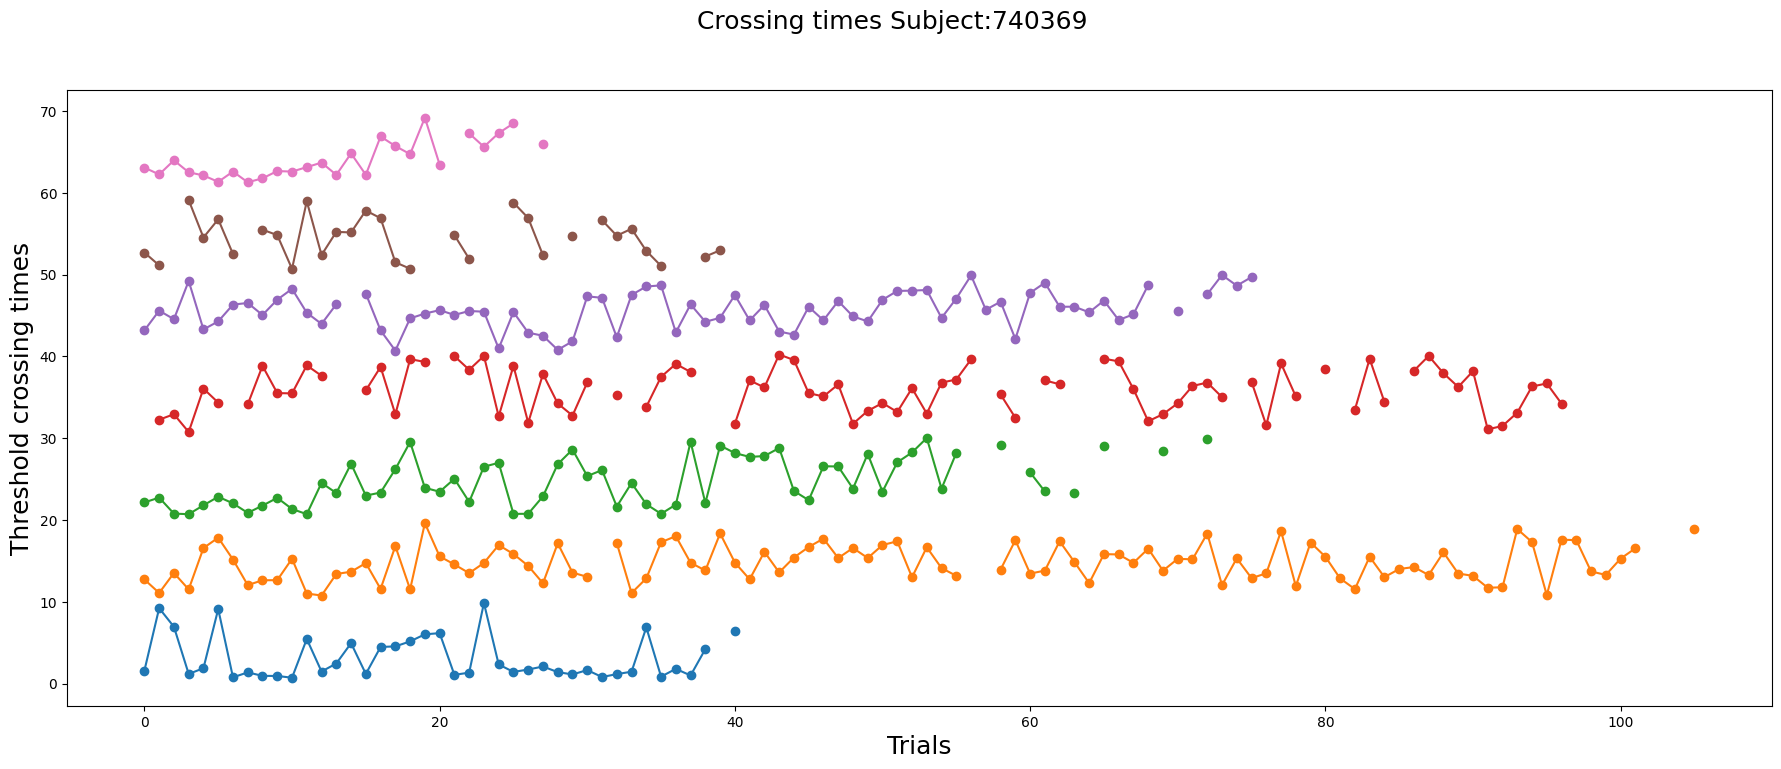

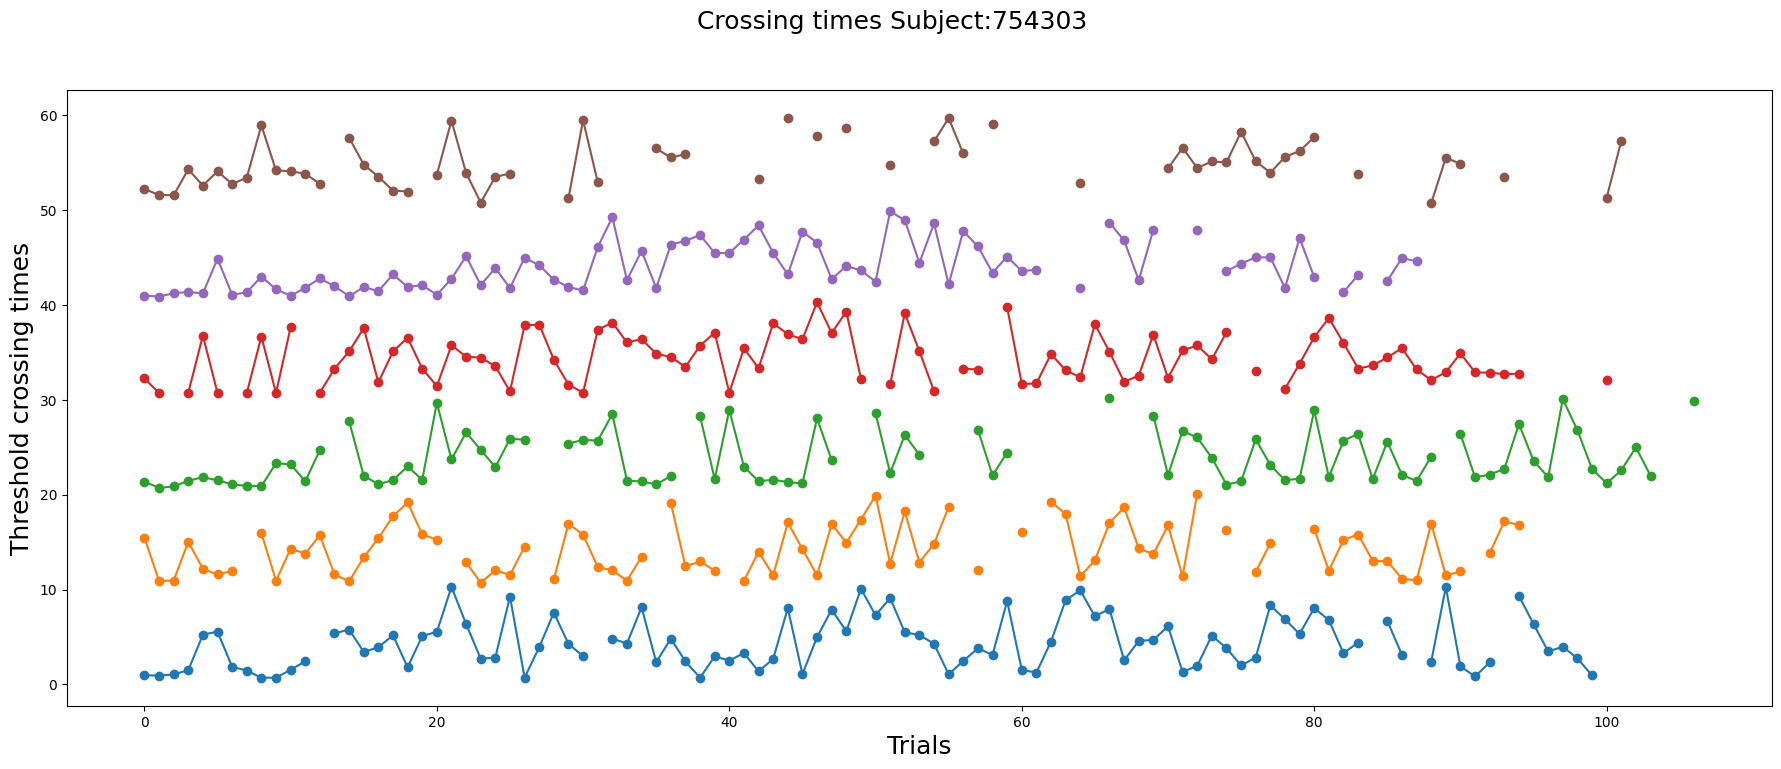

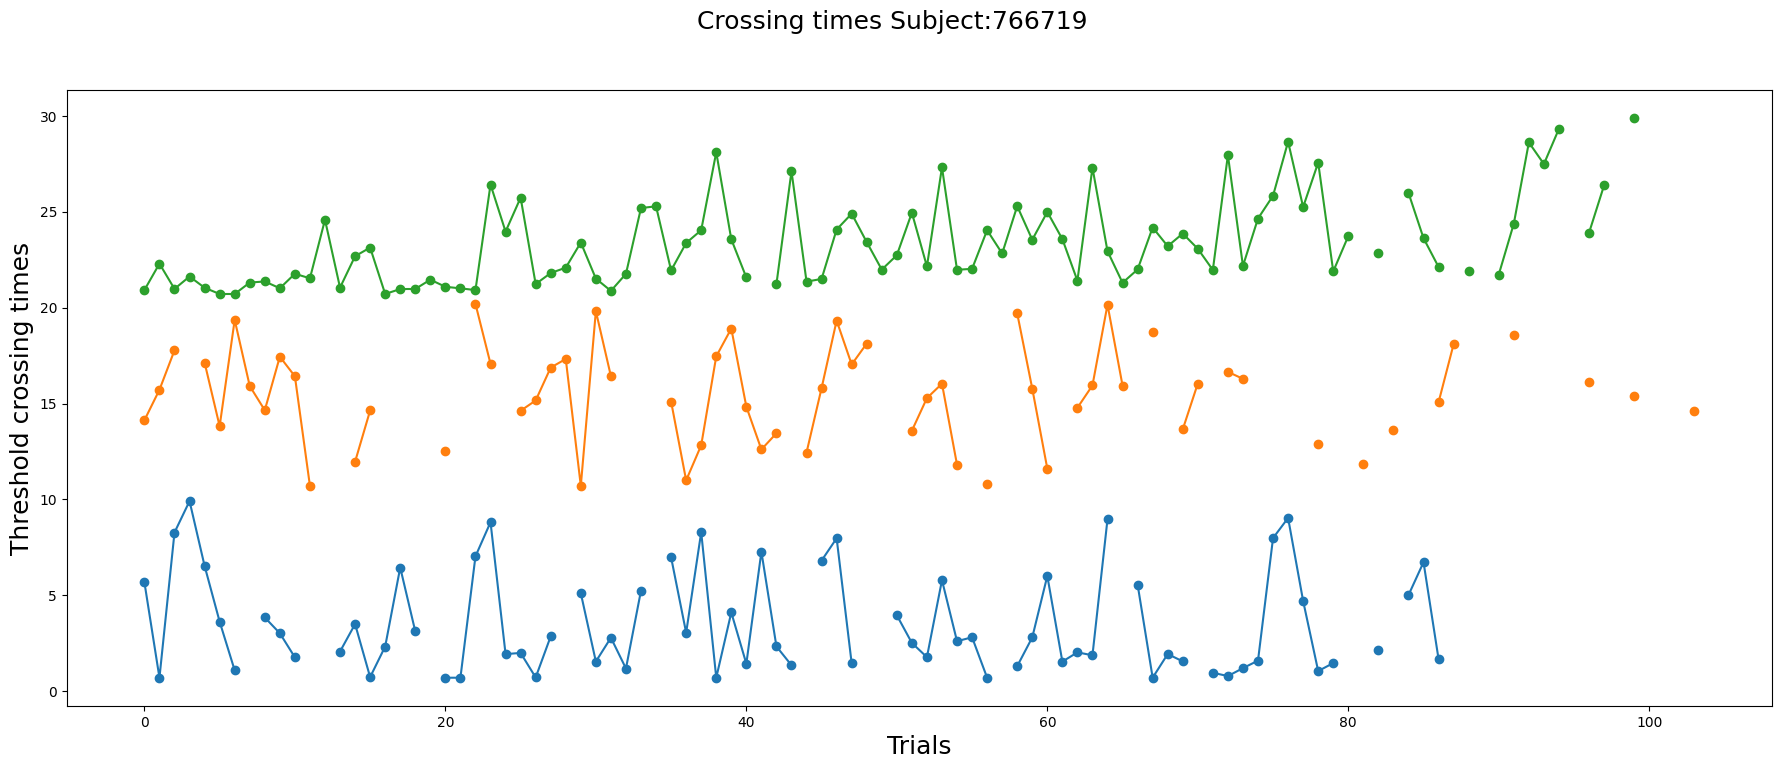

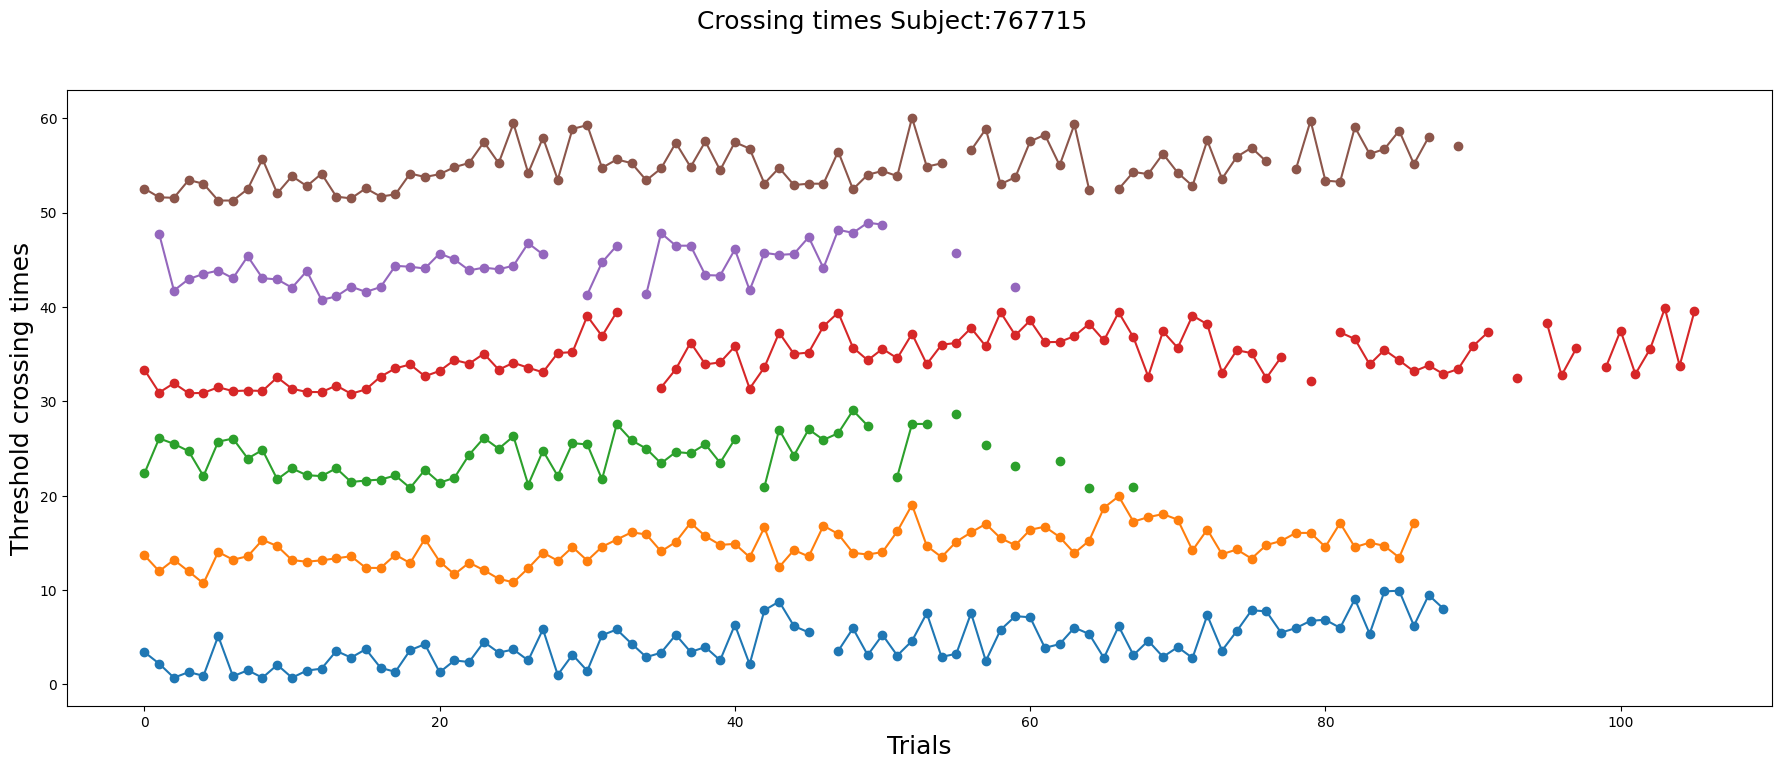

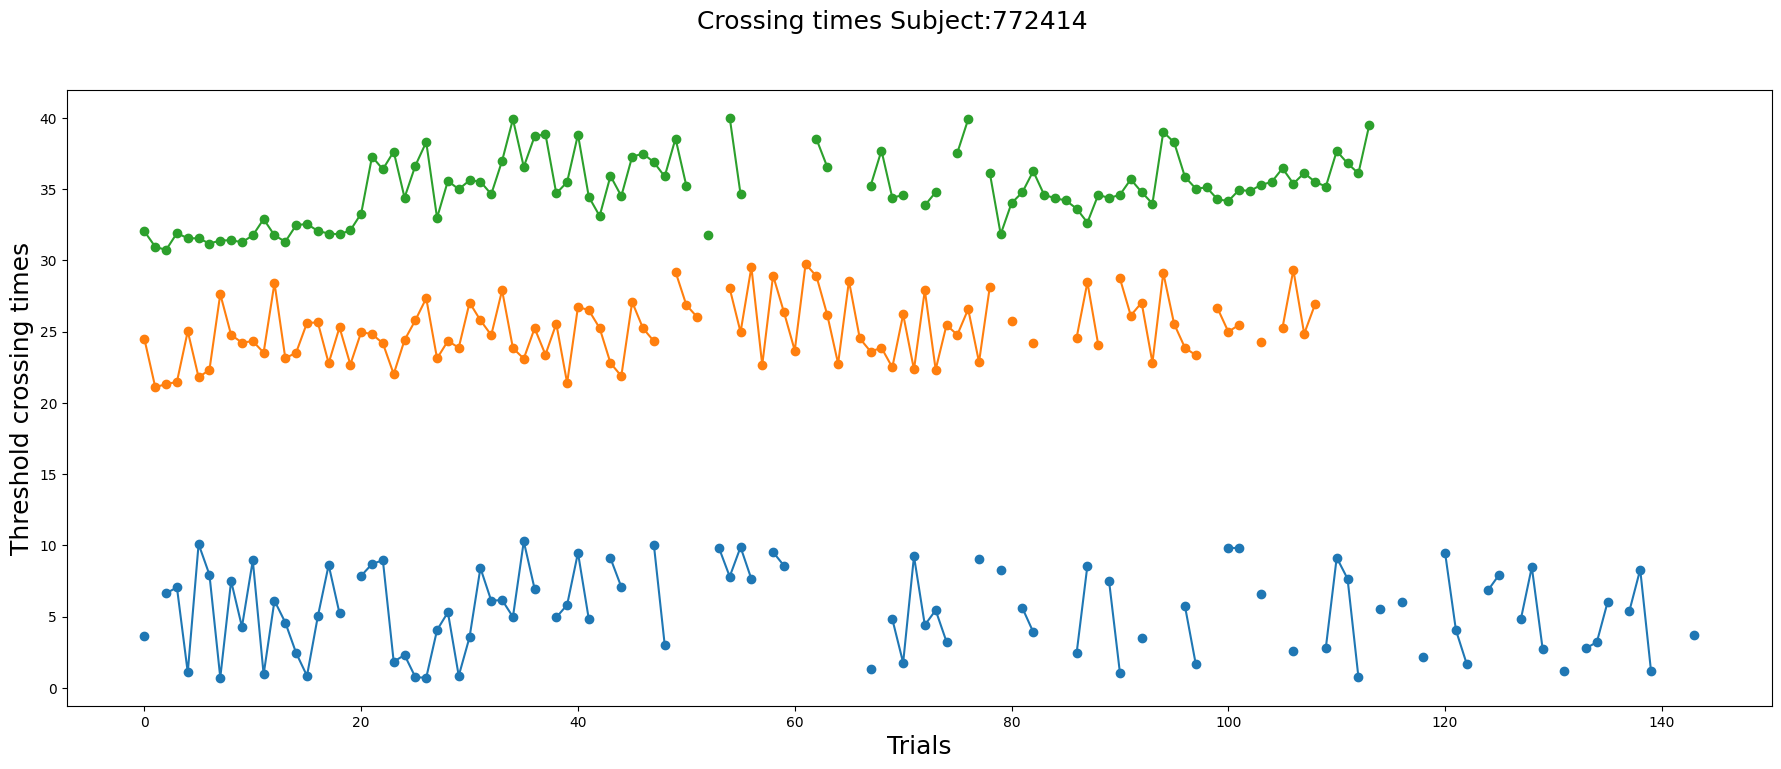

In [13]:
for i_sub in subject_ids:

    # Select subject metadata, sorted by 'session_number'
    this_mouse_metadata = metadata[metadata['subject_id']==i_sub].sort_values(by='session_number')
    session_names = this_mouse_metadata.name.values
    n_sessions = len(session_names)

    fig,ax = plt.subplots(figsize=(22,8))
    for i,i_session in enumerate(session_names):
        try:
            nwbfile = load.load_nwb_session_file(i_session)
        except:
            continue
        # read trials
        bci_trials = nwbfile.stimulus["Trials"].to_dataframe()
        threshold_crossing_times = bci_trials['threshold_crossing_times']
        # plot threshold_crossing_times
        ax.plot(threshold_crossing_times+i*10)
        ax.scatter(np.arange(len(threshold_crossing_times)),threshold_crossing_times+i*10)
        ax.set_xlabel('Trials', fontsize=18)
        ax.set_ylabel('Threshold crossing times', fontsize=18)
        fig.suptitle(f'Crossing times Subject:{i_sub}', fontsize=18)
    
    if save:
        subdir = f'{i_sub}'
        output = Path(f'{savepath}/{subdir}')
        output.mkdir(parents=True, exist_ok=True)
        figname= f'crossing_times.{save_format}'
        fig.savefig(output/figname,format=save_format,bbox_inches="tight")

In [14]:
bci_trials = nwbfile.stimulus["Trials"].to_dataframe()

In [16]:
zaber_steps =np.array(bci_trials['zaber_step_times'].tolist())

<ErrorbarContainer object of 3 artists>

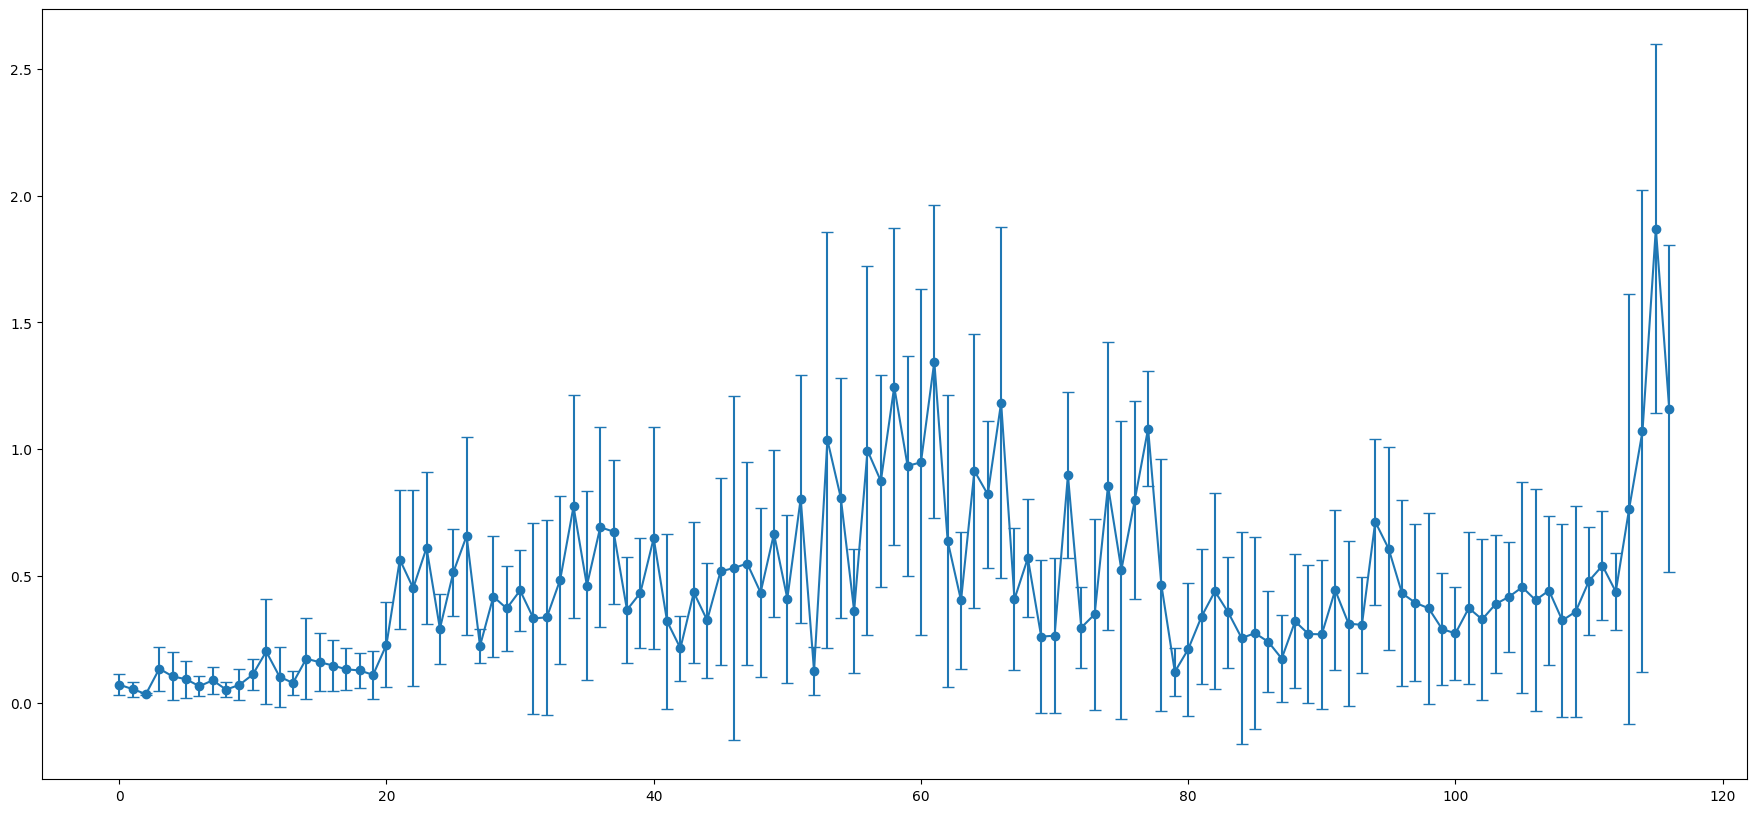

In [27]:
fig,ax=plt.subplots(figsize=(22,10))
diff_steps= np.diff(zaber_steps,axis=1)
mean_steps = np.nanmean(diff_steps,axis=1)
std_steps = np.nanstd(diff_steps,axis=1)

plt.errorbar(range(len(mean_steps)),mean_steps, yerr=std_steps, fmt='-o', capsize=4, label='Data with Std Dev')

In [ ]:
# # Get dff_ttraces
# dff_traces = nwbfile.processing["processed"].data_interfaces["dff"].roi_response_series["dff"].data
# print('dff shape (nframes, nrois):',np.shape(dff_traces))
# # 
# frame_rate = nwbfile.imaging_planes["processed"].imaging_rate
# print('Frame Rate:', frame_rate)

dff shape (nframes, nrois): (213782, 1558)
Frame Rate: 58.2634
